# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
import pandas as pd

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [6]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [7]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [8]:
%matplotlib inline
# Load as pandas dataframe
dtaworld_bank = pd.read_json('data/world_bank_projects.json')
dtaworld_bank.head()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


# Problem 1. Find the 10 countries with most projects

In [9]:
# Load only the countryname and project_name, aggregate/groupby those since there may be multiple loans per project
dtacntryproj_count = dtaworld_bank[["countryname", "project_name"]].groupby(["countryname"]).count()
dtacntryproj_count = dtacntryproj_count.sort_values(by="project_name", ascending=False)
dtacntryproj_count.head(10)

,project_name
countryname,
People's Republic of China,19
Republic of Indonesia,19
Socialist Republic of Vietnam,17
Republic of India,16
Republic of Yemen,13
People's Republic of Bangladesh,12
Nepal,12
Kingdom of Morocco,12
Republic of Mozambique,11


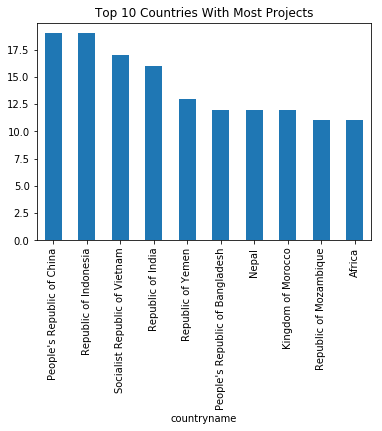

In [10]:
dtacntryproj_count = dtacntryproj_count.head(10)
dtacntryproj_count.plot(kind="bar", legend=False, title="Top 10 Countries With Most Projects")

# Problem 2. Find the top 10 major project themes (using column 'mjtheme_namecode')

In [11]:
# Solution 1
jsnworldbank = json.load((open('data/world_bank_projects.json')))
jsnworldbank_norm = json_normalize(jsnworldbank)
jsnworldbank_norm.head()

,_id.$oid,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,source,status,supplementprojectflg,theme1.Name,theme1.Percent,theme_namecode,themecode,totalamt,totalcommamt,url
0,52b213b38594d8a2be17c780,1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,IBRD,Active,N,Education for all,100,"[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,52b213b38594d8a2be17c781,2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,IBRD,Active,N,Other economic management,30,"[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,52b213b38594d8a2be17c782,2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,IBRD,Active,Y,Regional integration,46,"[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,52b213b38594d8a2be17c783,2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,IBRD,Active,N,Participation and civic engagement,50,"[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,52b213b38594d8a2be17c784,2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,IBRD,Active,N,Export development and competitiveness,30,"[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


In [12]:
jsnworldbank_norm = json_normalize(jsnworldbank, "mjtheme_namecode", ["id"])
jsnworldbank_norm.head()

,code,name,id
0,8,Human development,P129828
1,11,,P129828
2,1,Economic management,P144674
3,6,Social protection and risk management,P144674
4,5,Trade and integration,P145310


In [13]:
# Some rows are missing name values so these need to be cleaned up
# This can be done by replacing the empty strings with NaN and then fill forward after sorting.
# Note this can also be done with a function.
import numpy as np
jsnworldbank_norm = jsnworldbank_norm.replace("", np.nan, regex=False).sort_values(by=["code", "name"], ascending=False)
jsnworldbank_norm = jsnworldbank_norm.fillna(method='ffill')

In [14]:
# Now that the data has been cleaned up, group and sort descending to get the top 10 major themes.
jsnworldbank_agg = jsnworldbank_norm.groupby(["name"]).count()[["code"]].sort_values(by="code", ascending=False)
jsnworldbank_agg

,code
name,
Environment and natural resources management,250
Rural development,216
Human development,210
Public sector governance,199
Social protection and risk management,168
Financial and private sector development,146
Social dev/gender/inclusion,130
Trade and integration,77
Urban development,50


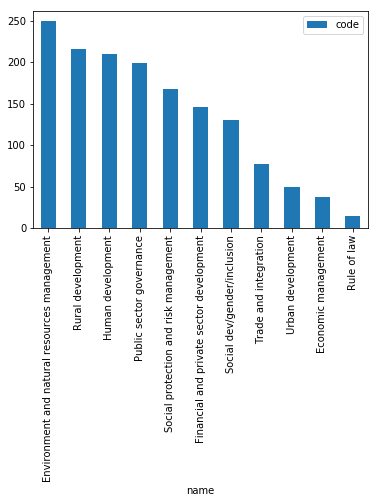

In [15]:
jsnworldbank_agg.plot(kind="bar")

In [16]:
# Solution 2
# Convert the column into seperate dictionary items per column.
dsrmjtheme_namecode = dtaworld_bank["mjtheme_namecode"].apply(pd.Series)
dsrmjtheme_namecode.head()

,0,1,2,3,4
0,"{'code': '8', 'name': 'Human development'}","{'code': '11', 'name': ''}",NaN,NaN,NaN
1,"{'code': '1', 'name': 'Economic management'}","{'code': '6', 'name': 'Social protection and r...",NaN,NaN,NaN
2,"{'code': '5', 'name': 'Trade and integration'}","{'code': '2', 'name': 'Public sector governance'}","{'code': '11', 'name': 'Environment and natura...","{'code': '6', 'name': 'Social protection and r...",NaN
3,"{'code': '7', 'name': 'Social dev/gender/inclu...","{'code': '7', 'name': 'Social dev/gender/inclu...",NaN,NaN,NaN
4,"{'code': '5', 'name': 'Trade and integration'}","{'code': '4', 'name': 'Financial and private s...",NaN,NaN,NaN


In [17]:
# Stack the columns by concatenating them into one long series and drop all Nulls
dsrmjtheme = pd.concat([dsrmjtheme_namecode[column] for column in dsrmjtheme_namecode]).dropna()
dsrmjtheme = dsrmjtheme.apply(pd.Series)
dsrmjtheme.head(15)

,code,name
0,8,Human development
1,1,Economic management
2,5,Trade and integration
3,7,Social dev/gender/inclusion
4,5,Trade and integration
5,6,Social protection and risk management
6,2,Public sector governance
7,11,Environment and natural resources management
8,10,Rural development
9,2,Public sector governance


In [18]:
# Some rows are missing name values so these need to be cleaned up
# This can be done by replacing the empty strings with NaN and then fill forward after sorting.
dsrmjtheme = dsrmjtheme.replace("", np.nan, regex=False).sort_values(by=["code", "name"], ascending=False)
dsrmjtheme = dsrmjtheme.fillna(method='ffill')

In [19]:
# Now that the data has been cleaned up, group and sort descending to get the top 10 major themes.
dsrmjtheme_agg = dsrmjtheme.dropna().groupby(["name"]).count().sort_values(by="code", ascending=False)
dsrmjtheme_agg.head(10)

,code
name,
Environment and natural resources management,250
Rural development,216
Human development,210
Public sector governance,199
Social protection and risk management,168
Financial and private sector development,146
Social dev/gender/inclusion,130
Trade and integration,77
Urban development,50


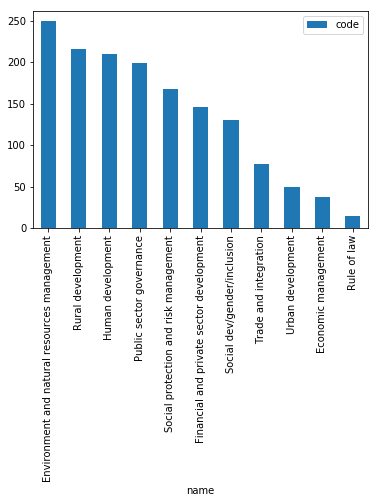

In [20]:
dsrmjtheme_agg.plot(kind="bar")

# Problem 3. In 2. some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [21]:
dsrmjtheme_agg = dsrmjtheme.groupby(["name"], as_index=False).first().sort_values(by="code", ascending=False)
dsrmjtheme_agg

,name,code
10,Urban development,9
3,Human development,8
7,Social dev/gender/inclusion,7
8,Social protection and risk management,6
9,Trade and integration,5
2,Financial and private sector development,4
5,Rule of law,3
4,Public sector governance,2
1,Environment and natural resources management,11
6,Rural development,10


In [22]:
dsrmjtheme_agg = dsrmjtheme_agg.set_index("code")
dsrmjtheme_agg

,name
code,
9,Urban development
8,Human development
7,Social dev/gender/inclusion
6,Social protection and risk management
5,Trade and integration
4,Financial and private sector development
3,Rule of law
2,Public sector governance
11,Environment and natural resources management


In [23]:
# Solution 1: Using a dictionary to update the current dataset
dctproj_theme = dsrmjtheme_agg["name"].to_dict()
for row in dtaworld_bank["mjtheme_namecode"].iteritems():
    for lstitem in row[1]:
        if lstitem["name"] == "":
            lstitem["name"] = dctproj_theme[lstitem["code"]]
            print(lstitem)
dtaworld_bank["mjtheme_namecode"].head(15)

{'code': '11', 'name': 'Environment and natural resources management'}
{'code': '6', 'name': 'Social protection and risk management'}
{'code': '8', 'name': 'Human development'}
{'code': '7', 'name': 'Social dev/gender/inclusion'}
{'code': '2', 'name': 'Public sector governance'}
{'code': '4', 'name': 'Financial and private sector development'}
{'code': '2', 'name': 'Public sector governance'}
{'code': '7', 'name': 'Social dev/gender/inclusion'}
{'code': '4', 'name': 'Financial and private sector development'}
{'code': '11', 'name': 'Environment and natural resources management'}
{'code': '7', 'name': 'Social dev/gender/inclusion'}
{'code': '4', 'name': 'Financial and private sector development'}
{'code': '8', 'name': 'Human development'}
{'code': '7', 'name': 'Social dev/gender/inclusion'}
{'code': '10', 'name': 'Rural development'}
{'code': '11', 'name': 'Environment and natural resources management'}
{'code': '4', 'name': 'Financial and private sector development'}
{'code': '10', 'na

0     [{'code': '8', 'name': 'Human development'}, {...
1     [{'code': '1', 'name': 'Economic management'},...
2     [{'code': '5', 'name': 'Trade and integration'...
3     [{'code': '7', 'name': 'Social dev/gender/incl...
4     [{'code': '5', 'name': 'Trade and integration'...
5     [{'code': '6', 'name': 'Social protection and ...
6     [{'code': '2', 'name': 'Public sector governan...
7     [{'code': '11', 'name': 'Environment and natur...
8     [{'code': '10', 'name': 'Rural development'}, ...
9     [{'code': '2', 'name': 'Public sector governan...
10    [{'code': '10', 'name': 'Rural development'}, ...
11    [{'code': '10', 'name': 'Rural development'}, ...
12    [{'code': '4', 'name': 'Financial and private ...
13    [{'code': '5', 'name': 'Trade and integration'...
14    [{'code': '6', 'name': 'Social protection and ...
Name: mjtheme_namecode, dtype: object

In [24]:
# Solution 2: Creating a separate column and updating the current one.

# Create function to create new dictionary object.
def create_mjtheme_col(dsrdata):
    lstrow = []
    for row in dsrdata:
        #print(row)
        lstrecords = []
        for code in row.split(","):
            dctthemes = {}
            dctthemes["code"] = code
            dctthemes["name"] = dctproj_theme[code]
            lstrecords.append(dctthemes)
            #print(lstrecords)
        lstrow.append(lstrecords)
    return lstrow

# Call function and convert list into data series.
dsrthemes = pd.Series(create_mjtheme_col(dtaworld_bank["mjthemecode"]))



In [26]:
# Assigning the new dataseries to the original dataset updates it.
dtaworld_bank["mjthemecode"] = dsrthemes

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...
5,{'$oid': '52b213b38594d8a2be17c785'},2014,October,2013-10-31T00:00:00Z,REPUBLIC OF KENYA,NaN,Republic of Kenya!$!KE,KE,Republic of Kenya,Kenya,...,JB,IBRD,Active,Y,"{'Percent': 100, 'Name': 'Social safety nets'}","[{'code': '54', 'name': 'Social safety nets'}]",54,10000000,10000000,http://www.worldbank.org/projects/P146161?lang=en
6,{'$oid': '52b213b38594d8a2be17c786'},2014,October,2013-10-29T00:00:00Z,GOVERNMENT OF INDIA,2019-06-30T00:00:00Z,Republic of India!$!IN,IN,Republic of India,India,...,TI,IBRD,Active,N,"{'Percent': 20, 'Name': 'Administrative and ci...","[{'code': '25', 'name': 'Administrative and ci...","39,25",500000000,500000000,http://www.worldbank.org/projects/P121185/firs...
7,{'$oid': '52b213b38594d8a2be17c787'},2014,October,2013-10-29T00:00:00Z,PEOPLE'S REPUBLIC OF CHINA,NaN,People's Republic of China!$!CN,CN,People's Republic of China,China,...,LR,IBRD,Active,N,"{'Percent': 100, 'Name': 'Climate change'}","[{'code': '81', 'name': 'Climate change'}]",81,0,27280000,http://www.worldbank.org/projects/P127033/chin...
8,{'$oid': '52b213b38594d8a2be17c788'},2014,October,2013-10-29T00:00:00Z,THE GOVERNMENT OF INDIA,2018-12-31T00:00:00Z,Republic of India!$!IN,IN,Republic of India,India,...,TI,IBRD,Active,N,"{'Percent': 87, 'Name': 'Other rural developme...","[{'code': '79', 'name': 'Other rural developme...",79,160000000,160000000,http://www.worldbank.org/projects/P130164/raja...
9,{'$oid': '52b213b38594d8a2be17c789'},2014,October,2013-10-29T00:00:00Z,THE KINGDOM OF MOROCCO,2014-12-31T00:00:00Z,Kingdom of Morocco!$!MA,MA,Kingdom of Morocco,Morocco,...,"BM,BC,BZ",IBRD,Active,N,"{'Percent': 33, 'Name': 'Other accountability/...","[{'code': '29', 'name': 'Other accountability/...","27,30,29",200000000,200000000,http://www.worldbank.org/projects/P130903?lang=en
